In [11]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.utils import plot_model

In [12]:
#Load the model
model = VGG16()

In [13]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

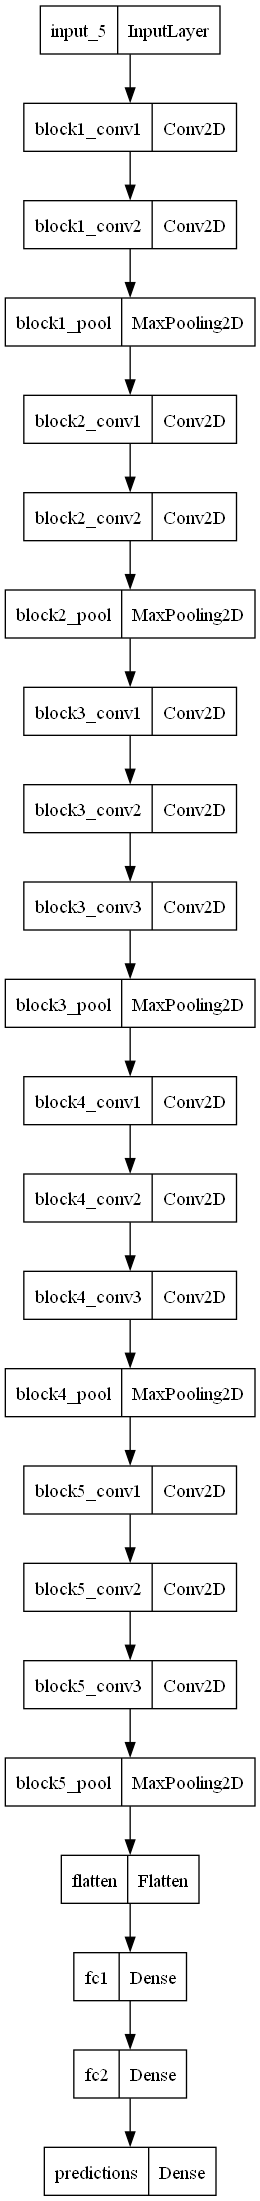

In [14]:
from keras.utils import plot_model
plot_model(model)

In [15]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.layers import Dense, Flatten

# Specify the desired input shape for InceptionV3
input_shape = (224, 224, 3)

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the convolutional base, unfreeze the last 3 convolutional layers
for layer in base_model.layers[:-3]:
    layer.trainable = False

# Create a new model with additional dense layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(13, activation='softmax'))

In [16]:
# Print the list of trainable and non-trainable layers
print("Trainable Layers:")
for layer in base_model.layers:
    if layer.trainable:
        print(layer.name)

print("\nNon-Trainable Layers:")
for layer in base_model.layers:
    if not layer.trainable:
        print(layer.name)

Trainable Layers:
block5_conv2
block5_conv3
block5_pool

Non-Trainable Layers:
input_6
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1


In [17]:
# Count trainable and non-trainable parameters
trainable_params = int(
    sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
)
non_trainable_params = int(
    sum([tf.keras.backend.count_params(w) for w in model.non_trainable_weights])
)

total_params = trainable_params + non_trainable_params

print("Trainable Parameters:", trainable_params)
print("Non-Trainable Parameters:", non_trainable_params)
print("Total Parameters:", total_params)

Trainable Parameters: 11146253
Non-Trainable Parameters: 9995584
Total Parameters: 21141837
